
# Random walker segmentation


The random walker algorithm determines the segmentation of an image from
a set of markers labeling several phases (2 or more). An anisotropic diffusion
equation is solved with tracers initiated at the markers' position. The local
diffusivity coefficient is greater if neighboring pixels have similar values,
so that diffusion is difficult across high gradients. The label of each unknown
pixel is attributed to the label of the known marker that has the highest
probability to be reached first during this diffusion process.

In this example, two phases are clearly visible, but the data are too
noisy to perform the segmentation from the histogram only. We determine
markers of the two phases from the extreme tails of the histogram of gray
values, and use the random walker for the segmentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.external import tifffile
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

In [2]:
# Generate noisy synthetic data
img = tifffile.imread("test_image.tif")
data = skimage.img_as_float(img)

In [3]:
# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = -np.ones(data.shape, dtype=np.uint)
markers[data < 0.35] = 1
markers[data > 0.7] = 2

# Run random walker algorithm
labels = random_walker(data, markers)

/Users/aymanebenayada/anaconda/lib/python3.5/site-packages/skimage/segmentation/random_walker_segmentation.py:382: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


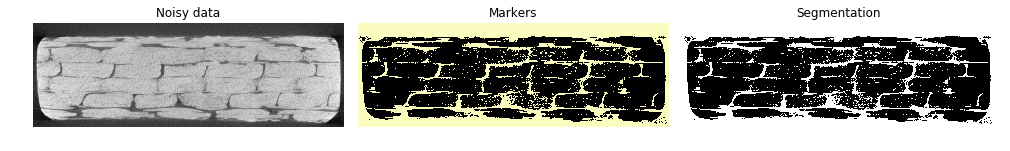

In [4]:
# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 12),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray', interpolation='nearest')
ax1.axis('off')

ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma', interpolation='nearest')
ax2.axis('off')

ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()